# Capstone Project 2 - Telco Customers Churn Prediction
Data from: https://www.kaggle.com/blastchar/telco-customer-churn

**I. Context and problem statement**  

    In recent year, competition in Telco industry is getting fiercer. Each company tries to survive in this competition by launching more attractive plans for customers to choose from. Customer churn has become a severe problem. It’s always easier to retain a customer than seeking a new one. Thus, it’s important to understand what really attracts our customers, and what may cause customers to leave. Besides, if the customer churn rate is high, it may affect the company’s goodwill, this is the other reason why we want to prevent customer churn. 

**II. Criteria of Success**

    In this project, we are committed to find out the features which are the most likely to cause the customer churn, and features which can help us prevent customers from leaving. After that, we will train several models on the dataset to figure out which features are the most important to predict churn, and determine the model we use to predict churn.



**III. Features Interpretation:**  

    1. Customers who left within the last month – the column is called Churn
    2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    4. Demographic info about customers – gender, age range, and if they have partners and dependents
    5. tenure - Number of months the customer has stayed with the company

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# 1. Overview of the Dataset

In [66]:
df = pd.read_csv('Telco Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**In next step, we will convert TotalCharges and tenure to numeric data type, and convert SeniorCitizen colomn to boolean data type.**

In [67]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace([1,0], ['Yes', 'No'])
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.tenure = pd.to_numeric(df['tenure'])

In [43]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**After exploring the dataset information, we have 11 missing value in column 'TotalCharges'. In this case, I would like to fill NaN value with the mean of the TotalCharges**

In [85]:
mode = df['TotalCharges'].mode()
df['TotalCharges'] = df['TotalCharges'].fillna(mode)

In [87]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


**From the above output, TotalCharges column has high mean and standard deviation. There is a big gap between the minimum value and maximum value. In order to dig deep in the properties of each variables, and evaluate the potential risk in our dataset, I will generate the pandas ProfileReport.**

In [6]:
profile = ProfileReport(df, title='Telco Customer Churn Dataset Profiling Report', explorative=True)
profile.to_notebook_iframe()
profile.to_file("Telco_Customer_Churn_Report.html")

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 2. Data Visualization
***

In [7]:
cat_col = []
noncat_col = []
for col in df.columns:
    if df[col].dtypes == 'object' and col != 'Churn':
        cat_col.append(col)
    elif df[col].dtypes != 'object' and col != 'Churn':
        noncat_col.append(col)        

In [8]:
def cat_plot(col_name):
    df_gender = df.groupby([col_name, 'Churn']).size().reset_index().pivot(columns='Churn', index=col_name, values=0)
#     fig, ax = plt.subplots(6,3, figsize=(16,20)) 
    
    ax = df_gender.plot(kind='bar', stacked=True, rot=0)
    plt.xlabel(col_name)
    plt.ylabel("Customer")
    ax.legend(loc='center', prop={'size':8})
    # plt.title(col, weight='bold')


    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), size = 11)
    
    return plt.show()
# plt.show()

## 2a. Customers General Information

**- Let's start from customers general information, which includes Gender, Senior Citizen, Partner, dependents. We will generate a bar plot and a cross table for each feature.**

### 1.Gender Distribution

Nearly 50% of the customers are male, and 50% are female. The number of churn in both genders are almost same. It seems like Gender has litter effect on customer churn.


Churn        No       Yes       All
gender                             
Female  0.36192  0.133324  0.495244
Male    0.37271  0.132046  0.504756
All     0.73463  0.265370  1.000000


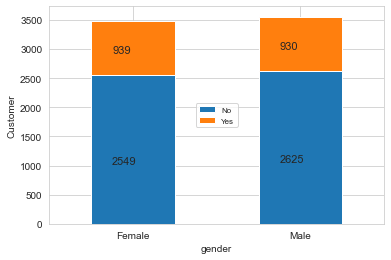

In [89]:
gender_table = pd.crosstab(df['gender'], df['Churn'],normalize=True, margins=True)
print(gender_table)
cat_plot('gender')

### 2. Senior Citizen

- 83% of the customers are not senior citizen, and 16% of them are senior. 
- 40% of the senior customer left for some reason, but only 20% of young customer churn.

Churn                No       Yes       All
SeniorCitizen                              
No             0.640068  0.197785  0.837853
Yes            0.094562  0.067585  0.162147
All            0.734630  0.265370  1.000000


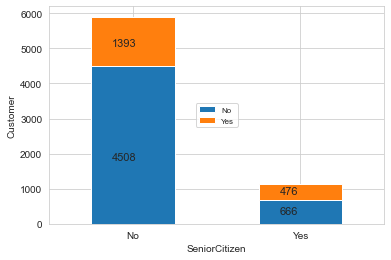

In [88]:
print(pd.crosstab(df['SeniorCitizen'], df['Churn'],normalize=True, margins=True))
cat_plot('SeniorCitizen')

### 3.Partner

- Half of the customers have partners. 
- 33% of the customers who don't have partner left, but only 18% of the customers who have partner churn.

Churn          No       Yes       All
Partner                              
No       0.346585  0.170382  0.516967
Yes      0.388045  0.094988  0.483033
All      0.734630  0.265370  1.000000


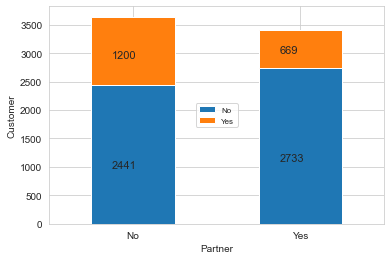

In [90]:
print(pd.crosstab(df['Partner'], df['Churn'],normalize=True, margins=True))
cat_plot('Partner')

### 4. Dependents
- 70% of the customers don't have dependents, 30% have dependents.
- 28% of the customers who don't have dependents left, but only 13% of the customers who have dependents churn

Churn             No       Yes       All
Dependents                              
No          0.481329  0.219083  0.700412
Yes         0.253301  0.046287  0.299588
All         0.734630  0.265370  1.000000


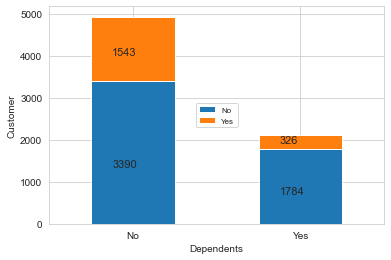

In [93]:
print(pd.crosstab(df['Dependents'], df['Churn'],normalize=True, margins=True))
cat_plot('Dependents')

## 2b. Services
**Now we move forward to Service features which includes PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.**

- From the following output, we can observe that the customers who don't have OnlineSecurity, OnlineBackup, DeviceProtection, Techsupport are more likely to churn.
- The customers who use Fiber optic InternetService are more likely to leave.

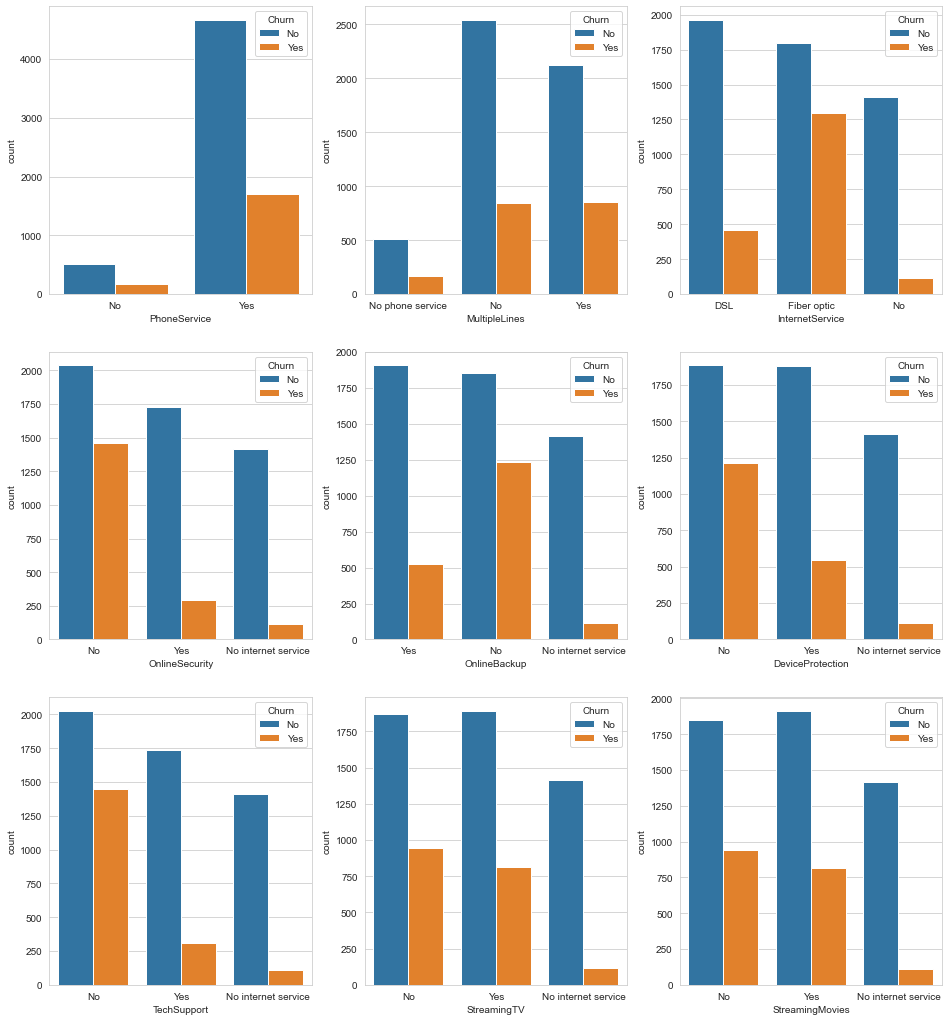

Churn               No       Yes       All
PhoneService                              
No            0.072696  0.024137  0.096834
Yes           0.661934  0.241232  0.903166
All           0.734630  0.265370  1.000000
****************************************
Churn                   No       Yes       All
MultipleLines                                 
No                0.360784  0.120545  0.481329
No phone service  0.072696  0.024137  0.096834
Yes               0.301150  0.120687  0.421837
All               0.734630  0.265370  1.000000
****************************************
Churn                  No       Yes       All
InternetService                              
DSL              0.278574  0.065171  0.343746
Fiber optic      0.255431  0.184154  0.439585
No               0.200625  0.016044  0.216669
All              0.734630  0.265370  1.000000
****************************************
Churn                      No       Yes       All
OnlineSecurity                                   
No  

In [96]:
service = cat_col[5:14]
fig, axes = plt.subplots(3,3, figsize=(16,18))

for col, ax in zip(service, axes.flat):
    sns.countplot(x=col, hue='Churn', data=df, ax=ax)
plt.show()

for col in service:
    print(pd.crosstab(df[col], df['Churn'], normalize=True, margins=True))
    print('*'*40)

## 2c. Contract information

- From the following chart, we can see that the customers who under the month-to-month contract are more likely to churn compare to the customers who under two year contract.
- The customers who pay the bill with electronic check are more seemingly to unsubsribe the service.



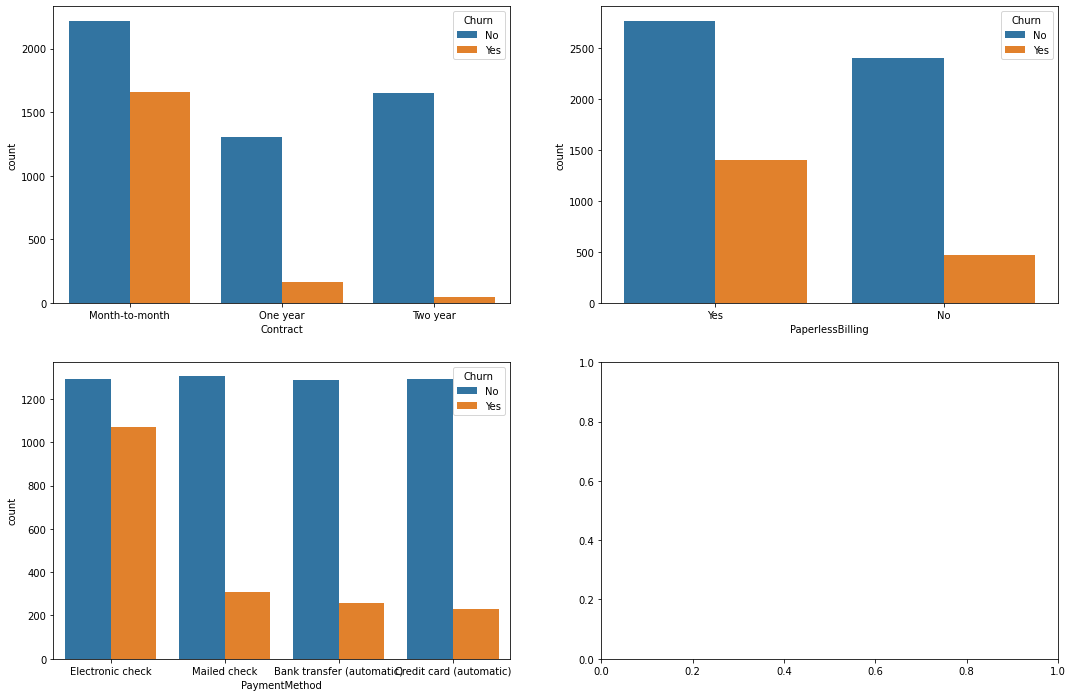

Churn                 No       Yes
Contract                          
Month-to-month  0.315207  0.234985
One year        0.185574  0.023570
Two year        0.233849  0.006815
**************************************************
Churn                  No       Yes
PaperlessBilling                   
No                0.34119  0.066591
Yes               0.39344  0.198779
**************************************************
Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.182593  0.036632
Credit card (automatic)    0.183161  0.032941
Electronic check           0.183729  0.152066
Mailed check               0.185148  0.043731
**************************************************


In [14]:
contract_col = cat_col[-3:]
fig, axes = plt.subplots(2,2, figsize=(18,12))
for col, ax in zip(contract_col, axes.flat):
    sns.countplot(x=col, hue='Churn', data=df, ax=ax)
    #plt.xticks(rotation=30)
plt.show()

for col in contract_col:
    print(pd.crosstab(df[col], df['Churn'], normalize=True))
    print('*'*50)

## 2d. Non-Categorical Features

- From the 'Tenure' plot, we are able to detect that the majority of the customers stay with our company only for 1 month. There is also a group of customers decide to stay with a long term contract. Obviously it's easier to unsubscribe if the customers are into short term contract.
- Most of the customers have very low monthly payment and total payment.

/Users/carolineliu/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/carolineliu/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/carolineliu/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

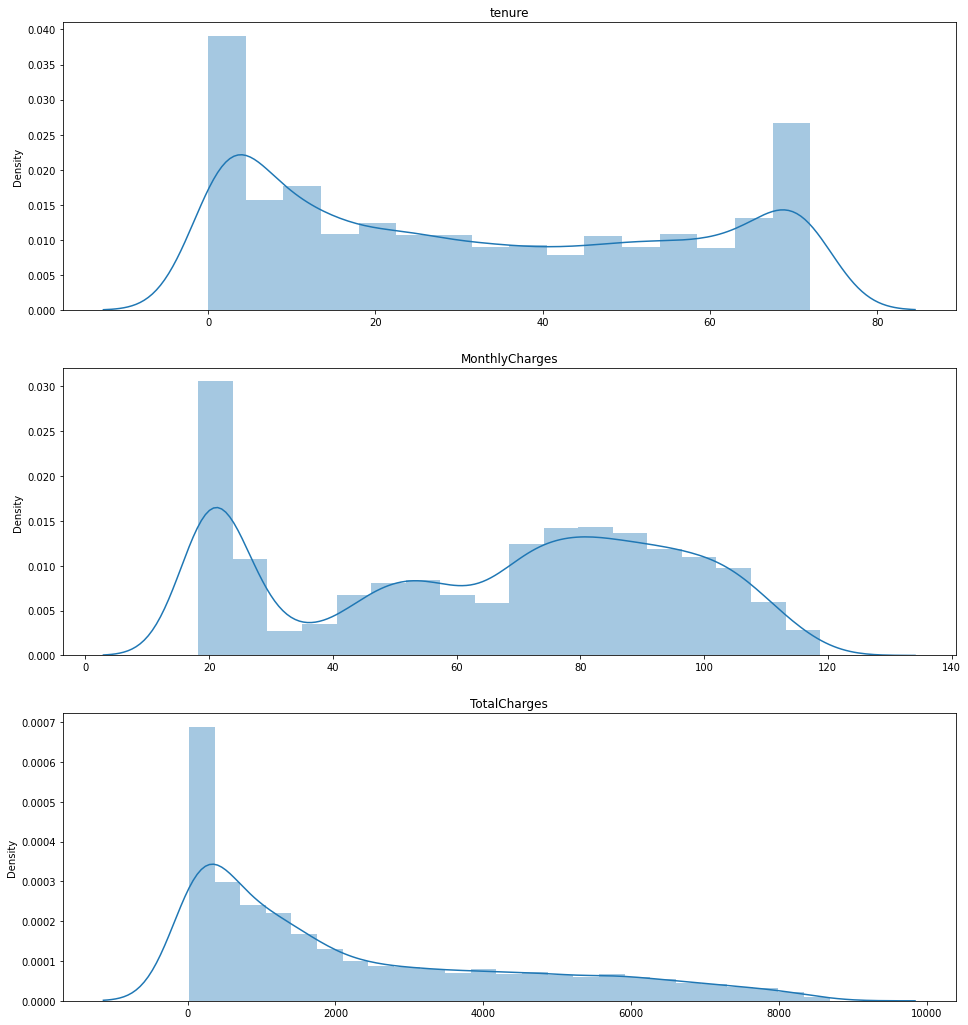

In [15]:
fig, axes = plt.subplots(3, figsize=(16,18))
for col, ax in zip(noncat_col, axes):
    sns.distplot(x=df[col], kde=True, hist=True, ax=ax)
    ax.set(title = col)
plt.show()

## 2e. Correlation of Churn with other features

- After exploring the correlation of chrun with other features, we found out that contract and services feature are more correlated with churn.

<AxesSubplot:>

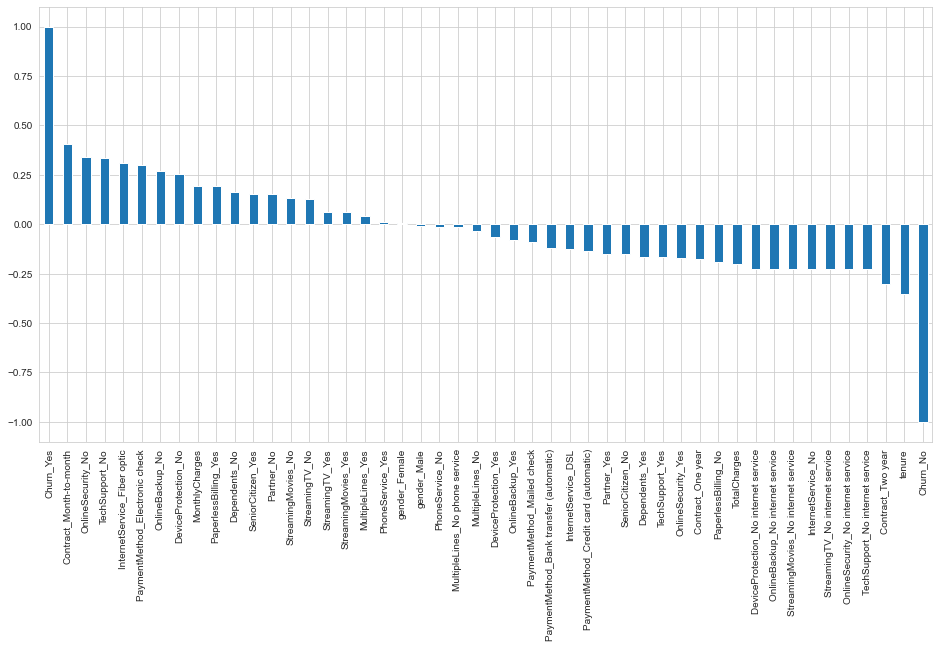

In [120]:
df_dummy = pd.get_dummies(df[[i for i in df.columns if i != 'customerID']])
df_dummy.corr()['Churn_Yes'].sort_values(ascending=False).plot(kind='bar', figsize=(16,8))

# 3. Hypothesis Testing

 - H0: The average MonthlyCharges difference is not due to the customer churn.
 - H1: The average MonthlyCharges difference will influence the customer churn.

In [17]:
# permutation sampling function
def permutation_sample(data1, data2):
    data = pd.concat([data1, data2])
    permuted_data = np.random.permutation(data)
    
    perm_sample1 = permuted_data[:len(data1)]
    perm_sample2 = permuted_data[len(data1):]
    
    return perm_sample1, perm_sample2

#Test statistics function difference of means
def diff_of_means(data1, data2):
    diff = np.mean(data1) - np.mean(data2)
    return diff

#permutation replicate
def perm_rep(data1, data2, func, size):
    rep_list = np.empty(size)
    for i in range(size):
        perm1, perm2 = permutation_sample(data1, data2)
        rep_list[i] = func(perm1, perm2)
    return rep_list

## 3.a EDA before Hypothesis Testing

*********************************************
Average Monthly Charges by Churn:
Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64
*********************************************


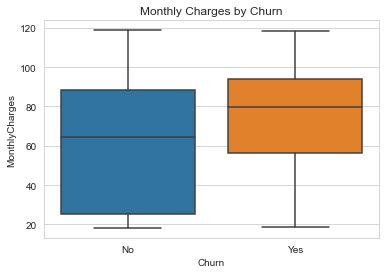

In [18]:
df_ht = df.copy()
print('*'*45)
print('Average Monthly Charges by Churn:')
print(df_ht.groupby('Churn')['MonthlyCharges'].mean())
print('*'*45)

sns.set_style('whitegrid')
sns.boxplot(data=df_ht, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()

**The average monthly charge of customers who have churned is 74, the average monthly charge of customers who haven't churned is 61, which is a bit lower than 74.**

P-Value: 2.1751097809888962e-33 0.0
********************************************************************************


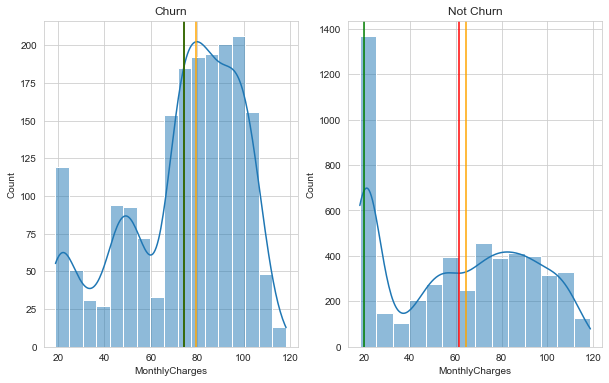

In [121]:


churn = df_ht[df_ht['Churn']=='Yes']['MonthlyCharges']
not_churn = df_ht[df_ht['Churn']=='No']['MonthlyCharges']

#Check if two arrays above are normal distributed
churn_normal = stats.normaltest(churn)
not_churn_normal = stats.normaltest(not_churn)
print('P-Value:', churn_normal[1], not_churn_normal[1])
print("*"*80)

figure, (ax0, ax1) = plt.subplots(1,2, figsize=(10,6))
sns.histplot(churn, ax=ax0, kde=True)
ax0.set_title('Churn')
sns.histplot(not_churn, ax=ax1, kde=True)
ax0.axvline(np.mean(churn), color='red')
ax0.axvline(np.median(churn), color='orange')
ax0.axvline(statistics.mode(churn), color='green')

ax1.set_title('Not Churn')
ax1.axvline(np.mean(not_churn), color='red')
ax1.axvline(np.median(not_churn), color='orange')
ax1.axvline(statistics.mode(not_churn), color='green')
plt.show()

- In above histplots, red line represent the mean, orange is the median, and green is the mode
- The p-value of the normal test is close to 0, which means the churn and not churn arrays above is not distributed.

In [20]:
df_ht['Permutation'] = np.random.permutation(df_ht['MonthlyCharges'])
df_ht.groupby('Churn')['Permutation'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,64.817859,29.998604,18.25,36.0125,70.40,89.75,118.75
Yes,1869.0,64.606207,30.349284,18.55,34.2000,70.15,90.10,118.65


In [21]:
df_ht.groupby('Churn')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [22]:
empirical_mean = diff_of_means(churn, not_churn)
perm_replicates = perm_rep(churn, not_churn, diff_of_means, size=10000)
p_value = np.sum(perm_replicates>=abs(empirical_mean)) / len(perm_replicates)

if p_value < 0.05:
    print('The p-value is '+str(p_value)+", which is less than or equal to 5%, so we reject the null hypothesis")
else:
    print('The p-value is '+str(p_value)+", which is greater than 5%, so we might accept the null hypothesis")

The p-value is 0.0, which is less than or equal to 5%, so we reject the null hypothesis


In [23]:
difference = []
for i in range(10000):
    df_ht['Permutation'] = np.random.permutation(df_ht['tenure'])
    diff = df_ht[df_ht['Churn'] == 'Yes']['Permutation'].mean() - df_ht[df_ht['Churn'] == 'No']['Permutation'].mean()
    difference.append(diff)

obs_difference = diff_of_means(churn, not_churn)
p_value = np.sum(np.array(difference) >= abs(obs_difference)) / len(difference)
if p_value < 0.05:
    print('The p-value is '+str(p_value)+", which is less than or equal to 5%, so we reject the null hypothesis")
else:
    print('The p-value is '+str(p_value)+", which is greater than 5%, so we might accept the null hypothesis")

    

The p-value is 0.0, which is less than or equal to 5%, so we reject the null hypothesis


**Since we got a 0 p-value, we should reject the null hypothesis. The monthly charge do influence the customer churn.**

# 4. Data Preprocessing

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [122]:
# Get dummies and drop the columns which have the duplicate information. 
df.drop('customerID', axis=1, inplace=True)
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [26]:
df_dummies.isnull().sum()
df_dummies['TotalCharges'].fillna(df_dummies['TotalCharges'].sum(), inplace=True)
df_dummies.isnull().sum()

tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
SeniorCitizen_Yes                        0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [123]:
# split the data into train and test set. The test size is 30%.
from sklearn.model_selection import train_test_split
random_state = 42
X = df_dummies.drop('Churn_Yes', axis=1)
y = df_dummies['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

# 5. Training Models and Performance Evaluation
a. logistic regression
b. K nearest neighbors
c. SVM
d. Decision Tree
e. Random Forest
f. Gradient Boosting

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline

from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, mean_squared_error

## 5.1 k-Nearest Neighbors Model

- First, we try the K-Nearest Neighbors Model with the scaled dataset. The best K neighbor is 8.
- The accuracy of this model is 77%, and the AUC score is 0.8.

In [29]:
X_scaled = scale(X)
X_train_scaled,X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size = 0.3, random_state = random_state) 

In [30]:
knn = KNeighborsClassifier()
# print(knn.get_params())
param_grid = {'n_neighbors': np.arange(10)}
knn_cv = GridSearchCV(knn, param_grid=param_grid, cv=5, n_jobs=-1)
knn_cv.fit(X_train_scaled, y_train_scaled)
y_pred = knn_cv.predict(X_test_scaled)
y_pred_prob = knn_cv.predict_proba(X_test_scaled)[:,1]

In [31]:
print('*'*80)
print('The best k is {0} , and the best score is {1:.4f}'.format(knn_cv.best_params_, knn_cv.best_score_))
print('The accuracy score of this model is {0:.4f}'.format(accuracy_score(y_test_scaled, y_pred)))
print('The Area under the ROC curve is {0:.4f}'.format(roc_auc_score(y_test_scaled, y_pred_prob)))
print('*'*80)
print('Confusion Matrix:')
print(confusion_matrix(y_test_scaled, y_pred))
print('*'*80)
print('Classification Report: ')
print(classification_report(y_test_scaled, y_pred))
print('*'*80)

********************************************************************************
The best k is {'n_neighbors': 8} , and the best score is 0.7714
The accuracy score of this model is 0.7743
The Area under the ROC curve is 0.8080
********************************************************************************
Confusion Matrix:
[[1386  153]
 [ 324  250]]
********************************************************************************
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1539
           1       0.62      0.44      0.51       574

    accuracy                           0.77      2113
   macro avg       0.72      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113

********************************************************************************


## 5.2 Logistic Regression

- The best classifer C of the logisitic regression model is 5, and the better penalty method is l2.
- The accuracy of the model increase to 80%, and it also helped to imporve the AUC score to 0.85
- The precision score of logistic regression model is slightly higher than that of KNN model, and the recall score remain the same.

In [32]:
log_reg = LogisticRegression()
# print(log_reg.get_params())
param_grid = {'C': np.arange(10), 'penalty': ['l1','l2']}
logreg_cv = GridSearchCV(log_reg, param_grid=param_grid, cv=5, n_jobs=-1)
logreg_cv.fit(X_train_scaled, y_train_scaled)
y_pred = logreg_cv.predict(X_test_scaled)
y_pred_prob = logreg_cv.predict_proba(X_test_scaled)[:,1]

In [33]:
print('*'*86)
print('The best hyperparameters are: {0}, and the best score is {1:.4f}'.format(logreg_cv.best_params_, logreg_cv.best_score_))
print('The accuracy score of the logistic model is {0:.4f}'.format(accuracy_score(y_test_scaled, y_pred)))
print('The Area under the ROC curve is {0:.4f}'.format(roc_auc_score(y_test_scaled, y_pred_prob)))
print('*'*86)
print('Confusion Matrix:')
print(confusion_matrix(y_test_scaled, y_pred))
print('*'*86)
print('Classification report: ')
print(classification_report(y_test_scaled, y_pred))
print('*'*86)

**************************************************************************************
The best hyperparameters are: {'C': 5, 'penalty': 'l2'}, and the best score is 0.8014
The accuracy score of the logistic model is 0.8097
The Area under the ROC curve is 0.8567
**************************************************************************************
Confusion Matrix:
[[1389  150]
 [ 252  322]]
**************************************************************************************
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.56      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

**************************************************************************************


## 5.3 Support Vector Machine
- The best gamma for SVM model is 7.
- The accuracy of the model down to 74%
- However, the recall score of this model is higher than other models: 0.96

In [34]:
svm = SVC()
# print(svm.get_params())
param_grid = {'gamma':np.arange(10)}
svm_cv = GridSearchCV(svm, param_grid = param_grid, cv=5, n_jobs=-1)
svm_cv.fit(X_train_scaled, y_train_scaled)
y_pred = svm_cv.predict(X_test_scaled)
# y_pred_prob = svm_cv.predict_proba(X_test_scaled)[:,1]

In [35]:
print('*'*80)
print('The best hyperparameters are: {0}, and the best score is {1:.4f}'.format(svm_cv.best_params_, svm_cv.best_score_))
print('The accuracy score of the SVM model is {0:.4f}'.format(accuracy_score(y_test_scaled, y_pred)))
# print('The Area under the ROC curve is {0:.4f}'.format(roc_auc_score(y_test_scaled, y_pred_prob)))
print('*'*80)
print('Confusion Matrix:')
print(confusion_matrix(y_test_scaled, y_pred))
print('*'*80)
print('Classification report: ')
print(classification_report(y_test_scaled, y_pred))
print('*'*80)

********************************************************************************
The best hyperparameters are: {'gamma': 7}, and the best score is 0.7604
The accuracy score of the SVM model is 0.7430
********************************************************************************
Confusion Matrix:
[[1478   61]
 [ 482   92]]
********************************************************************************
Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1539
           1       0.60      0.16      0.25       574

    accuracy                           0.74      2113
   macro avg       0.68      0.56      0.55      2113
weighted avg       0.71      0.74      0.68      2113

********************************************************************************


## 5.4 Decision Tree

- The maximun depth of the decision tree model is 5, and the min samples split is 2.
- The accuracy of the DT model is 78%, and AUC score is 0.82
- This model has a relative lower recall score: 0.86.

In [36]:
dt = DecisionTreeClassifier()
# print(dt.get_params())
param_grid = {'max_depth':np.arange(1,10), 'min_samples_split':np.arange(2,10)}
dt_cv = GridSearchCV(dt, param_grid=param_grid, cv=5)
dt_cv.fit(X_train, y_train)
y_pred = dt_cv.predict(X_test)
y_pred_prob = dt_cv.predict_proba(X_test)[:,1]

In [37]:
print('*'*100)
print('The best hyperparameters are: {0}, and the best score is {1:.4f}'.format(dt_cv.best_params_, dt_cv.best_score_))
print('The accuracy score of the Decision Tree model is {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('The Area under the ROC curve is {0:.4f}'.format(roc_auc_score(y_test, y_pred_prob)))
print(mean_squared_error(y_test, y_pred)**(1/2))
print('*'*100)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('*'*100)
print('Classification report: ')
print(classification_report(y_test, y_pred))
print('*'*100)

****************************************************************************************************
The best hyperparameters are: {'max_depth': 5, 'min_samples_split': 2}, and the best score is 0.7884
The accuracy score of the Decision Tree model is 0.7894
The Area under the ROC curve is 0.8267
0.4589128906161677
****************************************************************************************************
Confusion Matrix:
[[1322  217]
 [ 228  346]]
****************************************************************************************************
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1539
           1       0.61      0.60      0.61       574

    accuracy                           0.79      2113
   macro avg       0.73      0.73      0.73      2113
weighted avg       0.79      0.79      0.79      2113

**************************************************************************************

## 5.5 Random Forest

- The accuracy of the Random forest is 80%, and the AUC score is 0.82
- The recall score of random forest is higher than that of decision tree model.
- From the features importance plot, we can see the total charges, monthly charges and the tenure are more important in this model.

In [141]:
rf = RandomForestClassifier()
param_grid = {'n_estimators':np.arange(400,500), 'min_samples_leaf':np.arange(0.1,1)}
rf_cv = RandomizedSearchCV(rf, param_distributions=param_grid, cv=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [142]:
print('*'*100)
# print('The best hyperparameters are: {0}, and the best score is {1:.4f}'.format(rf.best_params_, rf.best_score_))
print('The accuracy score of the Decision Tree model is {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('The Area under the ROC curve is {0:.4f}'.format(roc_auc_score(y_test, y_pred_prob)))
print('The Mean Squared error is {0:.4f}'.format(mean_squared_error(y_test, y_pred)**(1/2)))
print('*'*100)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('*'*100)
print('Classification report: ')
print(classification_report(y_test, y_pred))
print('*'*100)

****************************************************************************************************
The accuracy score of the Decision Tree model is 0.7993
The Area under the ROC curve is 0.8267
The Mean Squared error is 0.4480
****************************************************************************************************
Confusion Matrix:
[[1410  129]
 [ 295  279]]
****************************************************************************************************
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.68      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

****************************************************************************************************


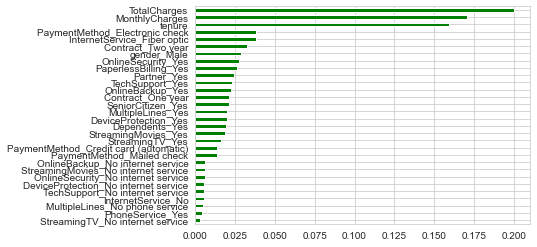

In [143]:
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='green')
plt.show()

## 5.6 Gradient Boosting

In [ ]:
gbt = GradientBoostingClassifier()
param_grid = {'n_estimators':np.arange(400,500), 'max_depth':np.arange(3,10)}
gbt_cv = RandomizedSearchCV(gbt, param_distributions=param_grid, cv=5)
gbt_cv.fit(X_train, y_train)
y_pred = gbt_cv.predict(X_test)

In [ ]:
print('*'*100)
# print('The best hyperparameters are: {0}, and the best score is {1:.4f}'.format(rf.best_params_, rf.best_score_))
print('The accuracy score of the Decision Tree model is {0:.4f}'.format(accuracy_score(y_test, y_pred)))
# print('The Area under the ROC curve is {0:.4f}'.format(roc_auc_score(y_test, y_pred_prob)))
print('The Mean Squared error is {0:.4f}'.format(mean_squared_error(y_test, y_pred)**(1/2)))
print('*'*100)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('*'*100)
print('Classification report: ')
print(classification_report(y_test, y_pred))
print('*'*100)